<a href="https://colab.research.google.com/github/TrueNorth14/Basic-3D-terrain/blob/master/V_SD_HF_AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install diffusers["torch"] transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 KB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.5/191.5 KB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 30.6 MB/s eta 0:00:00


In [ ]:
from diffusers import 
  StableDiffusionPipeline, 
  StableDiffusionImg2ImgPipeline, 
  StableDiffusionDepth2ImgPipeline
import torch
import requests
from PIL import Image
from io import BytesIO

device = "cuda"
model_id = "Linaqruf/anything-v3.0"
branch_name = "diffusers"

pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(
    device
)
# pipe = StableDiffusionPipeline.from_pretrained(model_id, revision=branch_name, torch_dtype=torch.float16)
# pipe = pipe.to(device)

OSError: ignored

In [ ]:
url = "https://strikingloo.github.io/resources/ai-generated-images/stable-diffusion/selected/1460966951_A_beautiful_mansion_beside_a_waterfall_in_the_woods__by_Josef_Thoma__matte_painting_trending_on_artstation_HQ.png"

response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image.thumbnail((768, 768))


In [ ]:
prompt = "A beautiful mansion beside a waterfall in the woods, by josef thoma, matte painting, trending on artstation HQ"
images = pipe(prompt, image=init_image, strength=0.75, guidance_scale=8).images

  0%|          | 0/37 [00:00<?, ?it/s]

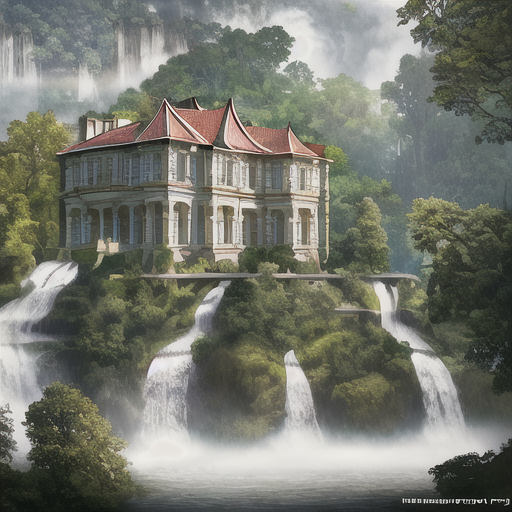

[None]

In [ ]:
from IPython.display import display

[display(image) for image in images]

# for i in range(len(images)):
#   images[i].save(f"{i}.png")